In [1]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 5.5 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
import statsmodels.api as sm
import yfinance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
GetStockinfo = yfinance.Ticker("AAPL")
Stock = GetStockinfo.history(period="2y")
Stock.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-12-18,68.926172,69.443489,68.758662,68.911392,116028400,0.0,0.0
2019-12-19,68.852252,69.266103,68.716768,68.980347,98369200,0.0,0.0
2019-12-20,69.524764,69.628223,68.620690,68.837471,275978000,0.0,0.0
2019-12-23,69.106005,70.022393,69.066589,69.960808,98572000,0.0,0.0
2019-12-24,70.130764,70.180036,69.694744,70.027298,48478800,0.0,0.0


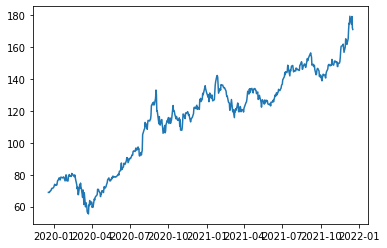

In [4]:
plt.plot(Stock['Close'])

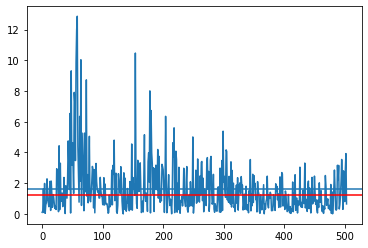

In [5]:
returns = 100 * Stock['Close'].pct_change().dropna()
returns = returns.to_numpy()
returns = np.abs(returns)
plt.plot(returns)
plt.axhline(y=np.mean(returns))
plt.axhline(y=np.median(returns),color='red')

In [6]:
from sklearn.metrics import mean_squared_error

In [8]:
df_train = Stock[:-24]
df_test = Stock[-24:]

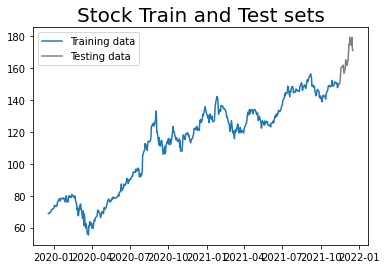

In [11]:


plt.title('Stock Train and Test sets', size=20)
plt.plot(df_train['Close'], label='Training data')
plt.plot(df_test['Close'], color='gray', label='Testing data')
plt.legend();



In [10]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Model parameters
span = 12 
alpha = 2 / (span + 1)

# Train the model
model = SimpleExpSmoothing(df_train['Close'])
results = model.fit(smoothing_level=alpha, optimized=False)
predictions = results.forecast(steps=24)

# Evaluate
rmse = mean_squared_error(df_test['Close'], predictions, squared=False)

# Plot
plt.title(f'DJIA Simple Exponential Smoothing predictions\nRMSE = {np.round(rmse, 2)}', size=20)
plt.plot(df_train['Close'], label='Training data')
plt.plot(df_test['Close'], color='gray', label='Testing data')
plt.plot(predictions, color='orange', label='Predictions')
plt.legend();

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f9622b9e5f0> (for post_execute):


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


ValueError: ignored

ValueError: ignored